This notebook generates the network diagram using networkX using the network diagram

In [1]:
import pandas as pd
import networkx as nx

In [2]:
directory = '../data/'

In [3]:
network_df = pd.read_csv(directory+'Tweet_table.csv')
network_df.columns = ['user1', 'user2', 'type']

In [4]:
network_df.head()

,user1,user2,type
0,@Blue_Footy,@Blue_Footy,Tweet
1,@QuesiTee,@Blue_Footy,Retweet
2,@JamesOlley,@JamesOlley,Tweet
3,@tommyboyjazzman,@JamesOlley,Retweet
4,@premierleague,@premierleague,Tweet


In [5]:
rt_in = network_df.type=='Retweet'
rts = network_df[rt_in]
tweets = network_df.drop(index= rts.index)

In [6]:
graph = nx.DiGraph()

In [7]:
graph.add_edges_from(zip(rts.user1, rts.user2), ttype = 'RT')
graph.add_edges_from(zip(tweets.user1, tweets.user2), ttype = 'tweet')

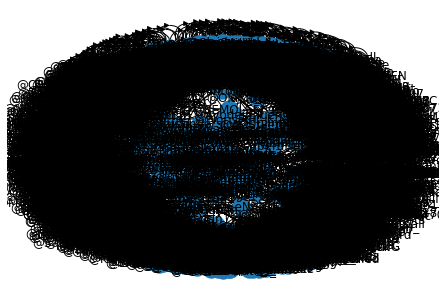

In [8]:
nx.draw(graph, with_labels = True)

In [16]:
graph_degree = pd.DataFrame(graph.degree()).sort_values(by=1, ascending = False)

In [12]:
pd.Series(nx.algorithms.centrality.betweenness.betweenness_centrality(graph)).sort_values()

@QuesiTee         0.000000e+00
@___spyder        0.000000e+00
@maestro_zinho    0.000000e+00
@NserekoDavid3    0.000000e+00
@naimkudo         0.000000e+00
                      ...     
@fiifi_0          1.005675e-07
@itzZMeJAKE       1.508513e-07
@FadiBanku_       2.011350e-07
@gomvfc           2.514188e-07
@NenyeChelsea     5.028375e-07
Length: 4461, dtype: float64

In [13]:
pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph)).sort_values(ascending=False)

@ManUtd             0.064574
@ChelseaFC          0.064574
@ChampionsLeague    0.050016
@TrollFootball      0.046861
@ESPNFC             0.043956
                      ...   
@DonFigo__          0.000000
@Darmmysarmmy       0.000000
@shasharma_eth      0.000000
@richiekav          0.000000
@Man                0.000000
Length: 4461, dtype: float64

In [26]:
degree = pd.Series(dict(graph.degree))

In [34]:
retweets_res = network_df[network_df.type == "Retweet"].groupby('user2').aggregate({'type':'count'})

In [36]:
retweets_res

,type
user2,
@00sfootbalI,2
@10CO10,1
@10FootballAU,3
@10_dreez,2
@10requiem,3
...,...
@young__god___,3
David,1
Man,1


In [ ]:
degree.join()